# Stackoverflow Survey Data Analysis

An analysis of diversity in language communities based on stack overflow survey data.

Import required libs

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import math

style.use('seaborn')
# style.available

Load Stackoverflow data

In [58]:
data = pd.read_csv('data/2019/survey_results_public.csv')


## Cleaning The Data

In [59]:
idx = 0
for row in data['Ethnicity']:
    if not isinstance(row, str):
        data.loc[idx, 'Ethnicity']='Not Specified'
    else:
        split_count = len(row.split(';'))
        if split_count > 2:
            data.loc[idx, 'Ethnicity']='Multiracial'
        elif split_count == 2:
             data.loc[idx, 'Ethnicity']='Biracial'
    idx +=1


In [60]:
idx = 0
for row in data['Gender']:
    if not isinstance(row, str):
        data.loc[idx, 'Gender']='Not Specified'
    idx += 1


Lets create some functions to help us count usages of a language. We should output how many stack overflow respondants use each language in the list.

In [61]:
langs = ['Python','JavaScript','Java','C#','Scala','Swift','Objective-C','Go','Rust','C++']
language_users = []

def count_for_lang(dataFrame, lang):
    count = 0
    for ww in dataFrame.LanguageWorkedWith:
        # print(ww)
        if lang in str(ww):
            count += 1
    return count

def handle_pair(pair):
    (total, chunk) = pair
    return (chunk/total) * 100

def get_percs(totals, chunks):
    return list(map(handle_pair, zip(totals, chunks)))

for lang in langs:
   count = count_for_lang(data, lang)
   language_users.append(count)

language_users

[36443, 59219, 70113, 27097, 3309, 5744, 4191, 7201, 2794, 20524]

In [62]:
def draw_graph(dt, labels, num_colors=16):
    cm = plt.get_cmap('tab20c')
    cNorm  = colors.Normalize(vmin=0, vmax=num_colors-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

    # Plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    width = 0.75

    totals = []
    for idx, group in enumerate(dt):
        if idx == 0:
            ax.bar(langs, group, width, color=scalarMap.to_rgba(idx))
            totals = group
        else:
            ax.bar(langs, group, width, bottom=totals, color=scalarMap.to_rgba(idx))
            for i in range(len(totals)):
                totals[i] = totals[i] + group[i]


    ax.legend(labels=labels, bbox_to_anchor=(1.04, 1))
    plt.show()

## Gender/Sex
The survey has a column called gender but it seems to refert to sex. 

The following is a distribution in percentage in each of the languages.

In [63]:
gender_groups = []

for g in data.Gender.unique():
    if isinstance(g, str):
        #This data is a bit dirty
        gender_groups.append(g)

gender_groups

['Man',
 'Not Specified',
 'Woman',
 'Non-binary, genderqueer, or gender non-conforming',
 'Woman;Non-binary, genderqueer, or gender non-conforming',
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
 'Woman;Man',
 'Man;Non-binary, genderqueer, or gender non-conforming']

In [64]:
data_by_group = []

for group_name in gender_groups:
    data_by_group.append(data[data.Gender == group_name])


In [65]:
count_for_group = []

for g in data_by_group:
    group_langs = []
    for lang in langs:
        group_langs.append(count_for_lang(g, lang))
    count_for_group.append(group_langs)


In [66]:
percentage_for_group = []

for c in count_for_group:
    p = get_percs(language_users, c)
    percentage_for_group.append(p)

### Gender By Count

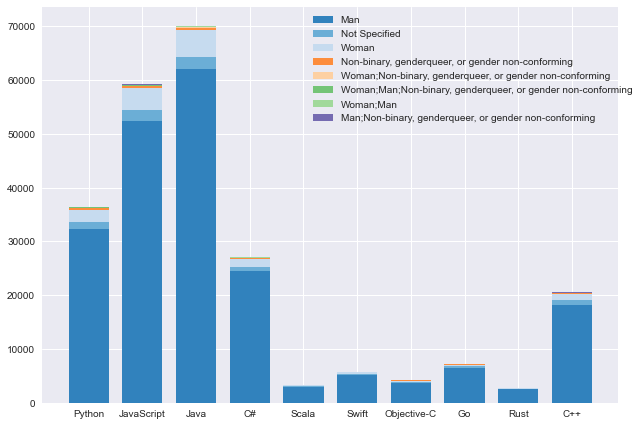

In [67]:
draw_graph(count_for_group, gender_groups, 12)

### Gender By Percentage

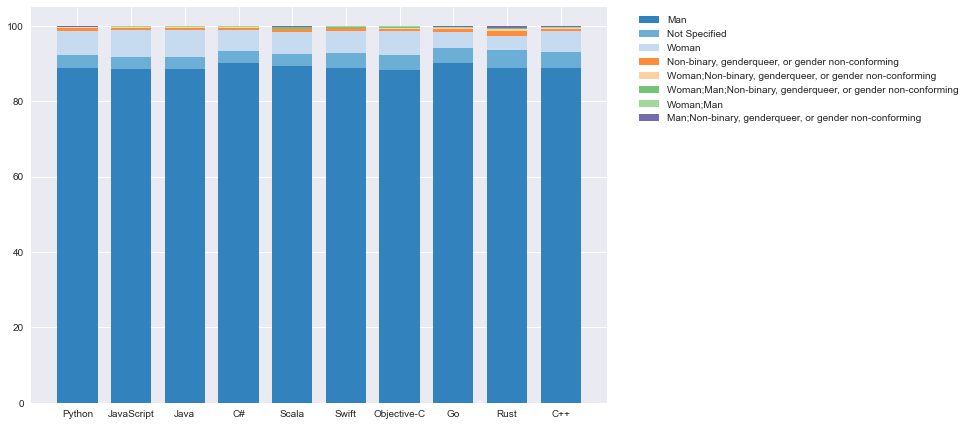

In [68]:
draw_graph(percentage_for_group, gender_groups, 12)

## Ethnic Groups

In [69]:
ethnic_groups = []

for g in data.Ethnicity.unique():
    if isinstance(g, str):
        if not ';' in g and not ',' in g: #This data is a bit dirty
            ethnic_groups.append(g)

ethnic_groups

['Not Specified',
 'White or of European descent',
 'Biracial',
 'East Asian',
 'Multiracial',
 'Black or of African descent',
 'Hispanic or Latino/Latina',
 'Middle Eastern',
 'South Asian']

In [70]:
data_by_group = []

for group_name in ethnic_groups:
    data_by_group.append(data[data.Ethnicity == group_name])


In [71]:
count_for_group = []

for g in data_by_group:
    group_langs = []
    for lang in langs:
        group_langs.append(count_for_lang(g, lang))
    count_for_group.append(group_langs)

In [72]:
percentage_for_group = []

for c in count_for_group:
    p = get_percs(language_users, c)
    percentage_for_group.append(p)



### Ethnicity By Count

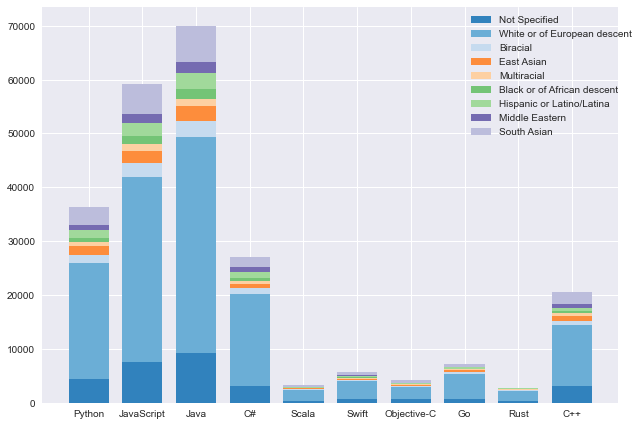

In [73]:
draw_graph(count_for_group, ethnic_groups, 12)

### Ethnicity By Percentage

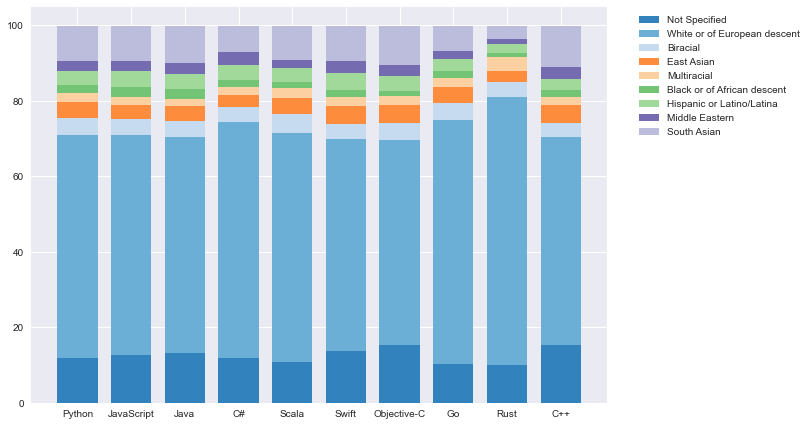

In [74]:
draw_graph(percentage_for_group, ethnic_groups, 12)